# Feature Extraction using Wavelate transformation  & Training & Prediction using SVM


In [94]:
# importing libraries
import numpy as np
import os
import cv2
import pywt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Use wavelet transform as a feature for traning our model

In [95]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [96]:
# function to transform imgage using wavelate transform
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [97]:
img = cv2.imread('./dataset/Virat_Kohli/1.jpg')
img.shape

(612, 491, 3)

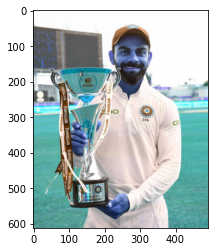

In [98]:
plt.imshow(img)

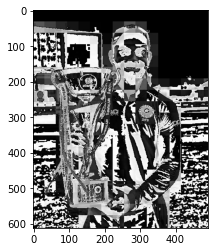

In [99]:
# to transform image using wavelate transform
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [100]:
img.shape

(612, 491, 3)

In [101]:
im_har.shape

(612, 492)

# Data Import And Prepare

In [102]:
# Import Dataset
import os
path_to_cr_data = "./cropped/"
cropped_image_dirs  = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)
cropped_image_dirs

['./cropped/Mary_Com',
 './cropped/Mithali_Raj',
 './cropped/MS_Dhoni',
 './cropped/PV_Sindhu',
 './cropped/Rahul_Dravis',
 './cropped/Saina_Nehwal',
 './cropped/Virat_Kohli']

In [103]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Mary_Com': ['./cropped/Mary_Com\\Mary_Com1.png',
  './cropped/Mary_Com\\Mary_Com10.png',
  './cropped/Mary_Com\\Mary_Com11.png',
  './cropped/Mary_Com\\Mary_Com12.png',
  './cropped/Mary_Com\\Mary_Com13.png',
  './cropped/Mary_Com\\Mary_Com14.png',
  './cropped/Mary_Com\\Mary_Com15.png',
  './cropped/Mary_Com\\Mary_Com16.png',
  './cropped/Mary_Com\\Mary_Com17.png',
  './cropped/Mary_Com\\Mary_Com2.png',
  './cropped/Mary_Com\\Mary_Com21.png',
  './cropped/Mary_Com\\Mary_Com26.png',
  './cropped/Mary_Com\\Mary_Com27.png',
  './cropped/Mary_Com\\Mary_Com28.png',
  './cropped/Mary_Com\\Mary_Com29.png',
  './cropped/Mary_Com\\Mary_Com3.png',
  './cropped/Mary_Com\\Mary_Com4.png',
  './cropped/Mary_Com\\Mary_Com5.png',
  './cropped/Mary_Com\\Mary_Com6.png',
  './cropped/Mary_Com\\Mary_Com7.png',
  './cropped/Mary_Com\\Mary_Com8.png',
  './cropped/Mary_Com\\Mary_Com9.png'],
 'Mithali_Raj': ['./cropped/Mithali_Raj\\Mithali_Raj1.png',
  './cropped/Mithali_Raj\\Mithali_Raj10.png',
  './cropp

In [104]:
# encoding label
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Mary_Com': 0,
 'Mithali_Raj': 1,
 'MS_Dhoni': 2,
 'PV_Sindhu': 3,
 'Rahul_Dravis': 4,
 'Saina_Nehwal': 5,
 'Virat_Kohli': 6}

In [105]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [106]:
len(X[0])

4096

In [107]:
X[0]

array([[ 13],
       [ 13],
       [ 13],
       ...,
       [254],
       [255],
       [ 32]], dtype=uint8)

In [108]:
y[0]

0

In [109]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

In [110]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=109)

# Model Generating & Training

In [111]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating the Model

In [112]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.metrics import classification_report

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8085106382978723


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.62      0.71      0.67         7
           2       0.85      0.92      0.88        12
           3       1.00      0.50      0.67         8
           4       0.71      0.83      0.77         6
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         7

    accuracy                           0.81        47
   macro avg       0.79      0.78      0.77        47
weighted avg       0.83      0.81      0.80        47



In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  0,  0,  0,  0,  0,  0],
       [ 1,  5,  1,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  1,  0],
       [ 0,  2,  0,  4,  2,  0,  0],
       [ 0,  0,  1,  0,  5,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

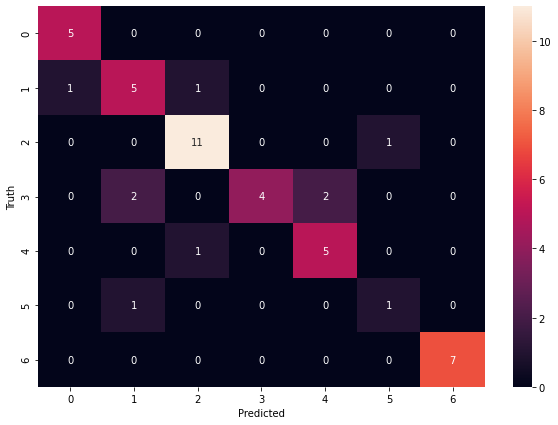

In [115]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
celeb_code = list(class_dict)
class_dict

{'Mary_Com': 0,
 'Mithali_Raj': 1,
 'MS_Dhoni': 2,
 'PV_Sindhu': 3,
 'Rahul_Dravis': 4,
 'Saina_Nehwal': 5,
 'Virat_Kohli': 6}

# Predicting Output

In [117]:
def test_img_convert(img):
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    return combined_img.transpose()

In [118]:
# import test image 1
img1 = cv2.imread('./test/1.jpg')

In [119]:
new_img1 = test_img_convert(img1)

[6] Virat_Kohli


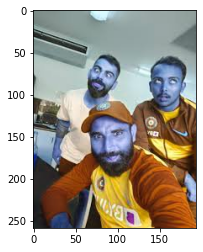

In [125]:
pred = clf.predict(new_img1)
print(pred, celeb_code[int(pred)])
plt.imshow(img1)

# End ------ End ------ End